# Diabetes Prediction - Big Data Analytics using Python

## 1. Abstract
***
Diabetes has become the third leading cause of death in the United States. Statistics state that 25% of people who have Diabetes are not aware of it.Statistics have also shown that there is a steady drop in the number of new diabetes cases since 2009 by implementing Big Data techniques.Using the analytics, we can identify the people who are at risk of developing Diabetes in the near future and provide necessary preventive care.Using predictive models in diabetes prediction helps people with diabetes live healthier lives. In Predictive models, we extract information from the existing data sets available and determine the patterns to predict future outcomes and trends Here we use Python to build a predictive model that would predict the outcome of a patient to be diabetic or not based on several parameters.

## 2. Data
***
### Source

We will be using the Pima Indian Diabetic dataset from UCI repository https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

### About DataSet

#### DataSet Information

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Attributes:

**Pregnancies**: Number of times pregnant<br/>
**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br/>
**BloodPressure**: Diastolic blood pressure (mm Hg)<br/>
**SkinThickness**: Triceps skin fold thickness (mm)<br/>
**Insulin**: 2-Hour serum insulin (mu U/ml)<br/>
**BMI**: Body mass index (weight in kg/(height in m)^2)<br/>
**DiabetesPedigreeFunction**: Diabetes pedigree function<br/>
**Age**: Age (years)<br/>
**Outcome**: Class variable (0 or 1)<br/>

### 2.1 Importing the dataset into a dataframe and displaying the content

In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

This shows that there are 500 samples in the dataset with the outcome 'Not diabetic' and 268 samples with the outcome 'Diabetic'

### 2.2 Visualizing the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E3F6978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAB3F98>]], dtype=object)

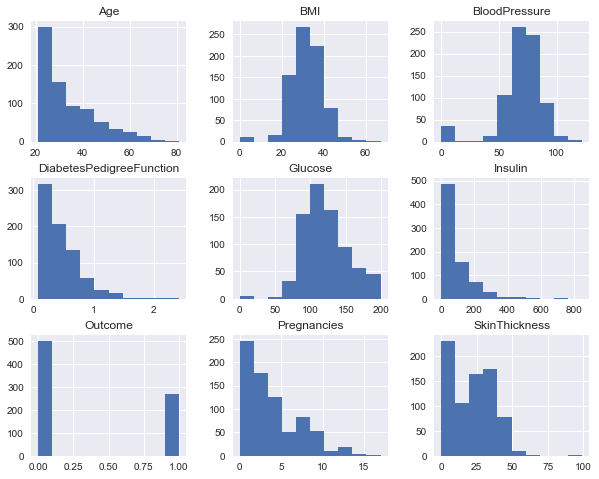

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
diabetes.hist(figsize=(10,8))

Now we will plot a correlation plot to look at the correlation among the various parameters

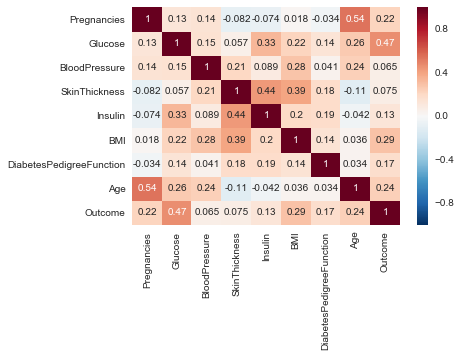

In [6]:
corr = diabetes[diabetes.columns].corr()
sns.heatmap(corr, annot = True)

### 2.3 Data setup for building model - Splitting the columns into features and outcome

We are replacing the 0 values in all the columns to the mean to better train the model

In [8]:
import numpy as np
zeros_attr =list(diabetes.columns[1:6])      # list all column names. 
diabetes[zeros_attr] = diabetes[zeros_attr].replace(0, np.NaN)
diabetes.fillna(diabetes.mean(), inplace=True) 
diabetes.dropna(inplace=True)

Also, from the above correlation plot we have seen that the SkinThickness has the least correlation with the class outcome and so we will not be considering this column for building our model. Setting up the data removing the SkinThickness column

In [9]:
features = diabetes.keys().values
array = diabetes.values
data = array[:,[0,1,2,4,5,6,7]]
target = array[:,8].astype(int)

## 3. Algorithm 

We will be using Decision Tree Algorithm from the scikit library to build the model. This application would typically belong to the Healthcare domain.

Decision Tree is a supervised learning technique for classification. We create a model that predicts the value of a target variable by learning simple decision rules inferred from the features of the data. For implementing this algorithm we split the dataset into training and test data and then measure the performance of the model. This algorithm helps in training a predictive model and predicting the outcome of a given parameter set.

We will be visualizing the generated decision tree by applying some constraints on the tree such as max_depth.
These results help infer decision on whether or not a person is diabetic or tend to be diabetic based on the past data.

### 3.1 Implementing Decision Tree using Scikit-learn

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, stratify=target, test_size=0.20, random_state=100)
initial_tree = DecisionTreeClassifier()
initial_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### Calculating metrics for the model

In [12]:
initial_tree_accuracy_training = (initial_tree.score(X_train, Y_train)*100)
initial_tree_accuracy_test = (initial_tree.score(X_test, Y_test)*100)
print 'Accuracy on Training data is ',initial_tree_accuracy_training,'%'
print 'Accuracy on Test data is ', initial_tree_accuracy_test,'%'

Accuracy on Training data is  100.0 %
Accuracy on Test data is  71.4285714286 %


Here we are getting an accuracy of 100% on the training dataset because there are no restrictions applied and went all the way down to the branching until it perfectly fit all the data. This is causing the model overfitting.

In [13]:
y_predict = initial_tree.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_mtrx = confusion_matrix(Y_test,y_predict)
confusion_mtrx

array([[76, 24],
       [20, 34]])

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

Since we have two prediction classes we have a 2x2 matrix. <br/>
From the above confusion matrix we can infer the below:<br/>
In 34 cases the classifier predicted correctly that a person has diabetes - **True Positive**<br/>
In 76 cases the classifier correctly predicted that a person does not have diabetes - **True Negative**<br/>
In 24 cases the classifier incorrectly predicted that a person has diabetes - **False Positive**<br/>
In 20 cases the classifier incorrectly predicted that a person does not have diabetes - **False Negative**

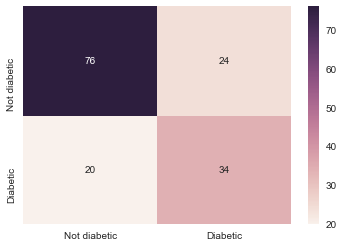

In [15]:
label = ["Not diabetic","Diabetic"]
sns.heatmap(confusion_mtrx, annot=True, xticklabels=label, yticklabels=label)

**Calculating sensitivity:**<br/>
When the actual value is positive, how often is the prediction correct? This is known as sensitivity of the model. It is also known as True Positive rate or Recall

In [16]:
from sklearn import metrics
initial_tree_sensitivity = (metrics.recall_score(Y_test,y_predict)*100)
print 'Sensitivity of the initial tree is ', initial_tree_sensitivity, '%'

Sensitivity of the initial tree is  62.962962963 %


**Precision:**<br/>
When a positive value is predicted, how often is the prediction correct? This is known as precision of the model. We are measuring how precise is the model in predicting positive instances

In [17]:
initial_tree_precision = (metrics.precision_score(Y_test,y_predict)*100)
print 'Precision of the initial tree is ',initial_tree_precision,'%'

Precision of the initial tree is  58.6206896552 %


**In our scenario, False positives are more acceptable over False negatives becasue we do not prefer a person with diabetes to be predicted as not diabetic but it is somewhat acceptable when a person with no diabetes is predicted to be diabetic. Hence we are mainly focusing on the sensitivity and Precision measures**

#### Building a Decision Tree using graphviz

In [19]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(initial_tree, out_file='visualization/initial_tree.dot', class_names=['diabetic','not diabetic'], feature_names=features[:-1],
               impurity=False, filled=True)

In [20]:
import pydot

(graph,) = pydot.graph_from_dot_file('visualization/initial_tree.dot')
graph.write_png('visualization/initial_tree.png')

True

![](visualization/initial_tree.png)

**Plotting the importance of features in classification**

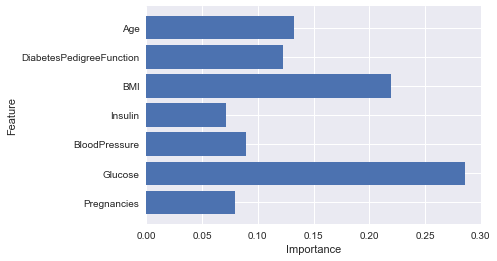

In [22]:
nfeatures = data.shape[1]
plt.barh(range(nfeatures),initial_tree.feature_importances_)
plt.yticks(np.arange(nfeatures),features[[0,1,2,4,5,6,7]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 3.2 Improving the model performance

**Dealing with overfitting**

**1. Pre-pruning:** Stop growing the tree earlier, before it perfectly classifies the training set.<br/>
**2. Post-pruning:** Allows the tree to perfectly classify the training set, and then post prune the tree.<br/>

We are trying to improve the performance of the model by applying few techniques and in each we will evaluate the overall score of the model, the sensitivity and the precision. Here we are starting with the Pre-pruning, followed by the Post-pruning and then will finally evaluate the metrics by changing the threshold. 

### 3.2.1 Pre-pruning

Here we are applying some pre-pruning techniques to deal with the overfitting. Pre-pruning is stopping the tree from growing after a certain point. We are restricting the maximum depth of the tree to 5 and min_samples_leaf=5 restricts the minimum number of samples required to be at a leaf node to 5 and we are restricting minimum number of leaf nodes required to split a particular node to be 2.

Decision Tree grows from the top choosing a variable at each step that best splits the set of items. We are using the Information Gain metric to choose the variable that best splits the set of items. Information gain is calculated at each step and is used to decide which feature to split on at each step in building the tree

In [23]:
pre_pruned_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf=5,min_samples_split=2, 
            presort=False, random_state=0)
pre_pruned_tree.fit(X_train, Y_train)
pre_pruned_accuracy_train = (pre_pruned_tree.score(X_train, Y_train)*100)
pre_pruned_accuracy_test = (pre_pruned_tree.score(X_test, Y_test)*100)
print 'Accuracy on Training data is ',pre_pruned_accuracy_train,'%'
print 'Accuracy on Test data is ', pre_pruned_accuracy_test,'%'

Accuracy on Training data is  82.2475570033 %
Accuracy on Test data is  78.5714285714 %


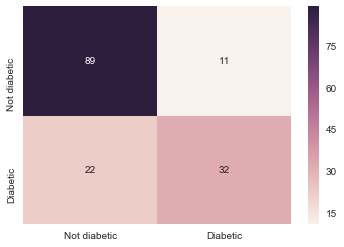

In [24]:
y_predict_pre_pruned = pre_pruned_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_mtrx_pre_pruned = confusion_matrix(Y_test,y_predict_pre_pruned)
#confusion_mtrx
label = ["Not diabetic","Diabetic"]
sns.heatmap(confusion_mtrx_pre_pruned, annot=True, xticklabels=label, yticklabels=label)


In [25]:
pre_pruned_sensitivity = metrics.recall_score(Y_test,y_predict_pre_pruned)*100
pre_pruned_precision = metrics.precision_score(Y_test,y_predict_pre_pruned)*100
print 'Sensitivity of pre-pruned tree is ', pre_pruned_sensitivity,'%'
print 'Precision of pre-pruned tree is ', pre_pruned_precision,'%'

Sensitivity of pre-pruned tree is  59.2592592593 %
Precision of pre-pruned tree is  74.4186046512 %


In [26]:
export_graphviz(pre_pruned_tree, out_file='visualization/pre_pruned_tree.dot', class_names=['diabetic','not diabetic'], feature_names=features[:-1],
               impurity=False, filled=True)

In [27]:
(graph,) = pydot.graph_from_dot_file('visualization/pre_pruned_tree.dot')
graph.write_png('visualization/pre_pruned_tree.png')

True

![](visualization/pre_pruned_tree.png)

### 3.2.2 Post-pruning

As a second method, we are trying to improve the accuracy by applying the Post-pruning to the tree.<br/>
We allow the tree to grow fully and follow the below steps:<br/>
-  Eliminate the test at a node N, both of whose children are leaves.
-  Compare the performance of the original tree and the pruned tree on the test set.
-  If difference is small, accept the pruning and repeat.
-  If the difference is large, restore the children and look for other places to prune.

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold
samples = tree.tree_.n_node_samples
#print n_nodes
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True


        
for i in range(n_nodes):
    score_current = tree.score(X_test, Y_test)
    #print score_current
    left = children_left[i]
    right = children_right[i]
    if(left!=-1 & right!=-1):
        if(children_left[left]==-1 & children_right[left]==-1 & children_left[right]==-1 & children_right[right]==-1):
            tree.tree_.children_left[i]=-1
            tree.tree_.children_right[i]=-1
            score_new = tree.score(X_test, Y_test)
            if(score_new<score_current):
                tree.tree_.children_left[i]=left
                tree.tree_.children_right[i]=right

In [30]:
post_pruned_accuracy_training = (tree.score(X_train,Y_train)*100)
post_pruned_accuracy_test = (tree.score(X_test,Y_test)*100)
print 'Accuracy on training data is ',post_pruned_accuracy_training ,'%'
print 'Accuracy on testing data is ', post_pruned_accuracy_test,'%'

Accuracy on training data is  94.6254071661 %
Accuracy on testing data is  74.025974026 %


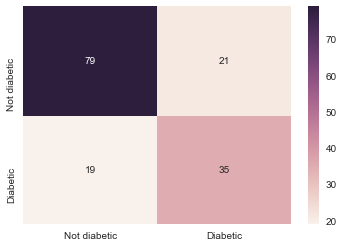

In [31]:
y_predict_post_pruned = tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_mtrx_post_pruned = confusion_matrix(Y_test,y_predict_post_pruned)
#confusion_mtrx
label = ["Not diabetic","Diabetic"]
sns.heatmap(confusion_mtrx_post_pruned, annot=True, xticklabels=label, yticklabels=label)

In [32]:
post_pruned_sensitivity = metrics.recall_score(Y_test,y_predict_post_pruned)*100
post_pruned_precision = metrics.precision_score(Y_test,y_predict_post_pruned)*100
print 'Sensitivity of post-pruned tree: ', post_pruned_sensitivity
print 'Precision of post-pruned tree: ', post_pruned_precision

Sensitivity of post-pruned tree:  64.8148148148
Precision of post-pruned tree:  62.5


In [33]:

export_graphviz(tree, out_file='visualization/post_prune_tree.dot', class_names=['diabetic','not diabetic'], feature_names=features[:-1],
               impurity=False, filled=True)

(graph,) = pydot.graph_from_dot_file('visualization/post_prune_tree.dot')
graph.write_png('visualization/post_prune_tree.png')

True

![](visualization/post_prune_tree.png)

### 3.2.3 Modifying Threshold

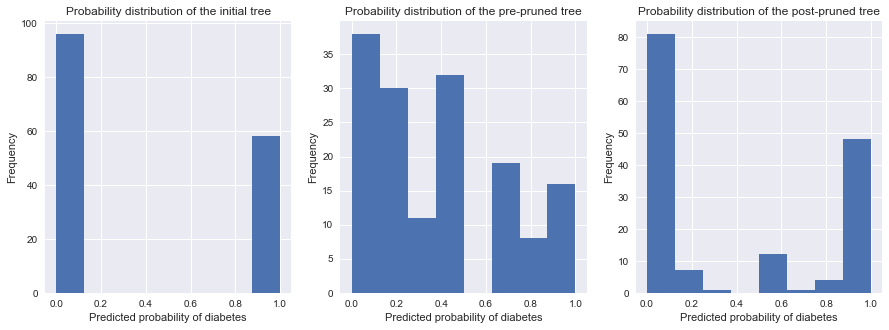

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(initial_tree.predict_proba(X_test)[:,1], bins=8)
plt.title('Probability distribution of the initial tree')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(pre_pruned_tree.predict_proba(X_test)[:,1], bins=8)
plt.title('Probability distribution of the pre-pruned tree')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(tree.predict_proba(X_test)[:,1], bins=8)
plt.title('Probability distribution of the post-pruned tree')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

plt.show()

In [35]:
#Storing the predicted probabilities for class 1
y_predict_probability = pre_pruned_tree.predict_proba(X_test)[:,1]

In [36]:
from sklearn.preprocessing import binarize
y_predict_new = binarize(y_predict_probability,0.3)[0]

C:\Users\SreePriya\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [37]:
confusion_mtrx_new = confusion_matrix(Y_test,y_predict_new)
confusion_mtrx_new

array([[64, 36],
       [ 7, 47]])

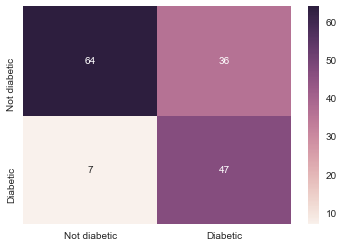

In [38]:
label = ["Not diabetic","Diabetic"]
sns.heatmap(confusion_mtrx_new, annot=True, xticklabels=label, yticklabels=label)

In [39]:
threshold_change_sensitivity = metrics.recall_score(Y_test,y_predict_new)*100
threshold_change_precision = metrics.precision_score(Y_test,y_predict_new)*100
print 'Sensitivity after threshold change is ', threshold_change_sensitivity,'%'
print 'Precision after threshold change is ', threshold_change_precision,'%'

Sensitivity after threshold change is  87.037037037 %
Precision after threshold change is  56.6265060241 %


## 4. Comparing Results

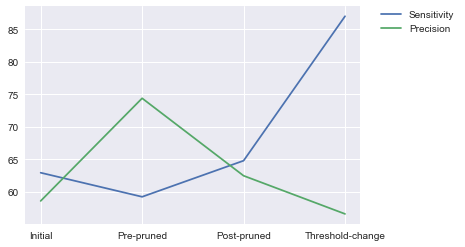

In [40]:
x = np.array([0,1,2,3])
xarray = ['Initial','Pre-pruned','Post-pruned','Threshold-change']
y_sensitivity = [initial_tree_sensitivity, pre_pruned_sensitivity, post_pruned_sensitivity,threshold_change_sensitivity ]
y_precision = [initial_tree_precision, pre_pruned_precision, post_pruned_precision, threshold_change_precision]
plt.xticks(x, xarray)
plt.plot(x, y_sensitivity, label="Sensitivity")
plt.plot(x, y_precision, label ="Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

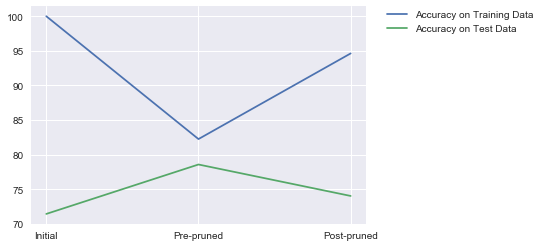

In [41]:
x = np.array([0,1,2])
xarray = ['Initial','Pre-pruned','Post-pruned']
y_training_accuracy = [initial_tree_accuracy_training, pre_pruned_accuracy_train, post_pruned_accuracy_training]
y_test_accuracy = [initial_tree_accuracy_test, pre_pruned_accuracy_test, post_pruned_accuracy_test]
plt.xticks(x, xarray)
plt.plot(x, y_training_accuracy, label="Accuracy on Training Data")
plt.plot(x, y_test_accuracy, label ="Accuracy on Test Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Key Observations

-  We have a close sensitivity and precision in the post-pruning method
-  The best sensitivity was attained when we applied a threshold change to the pre-pruned tree
-  The accuracy on training and test data were obtained when we applied pre-pruning 
-  Although there has been a small improvement even in the post-pruning case
-  Simpler decision tree was obtained using the Pre-pruning technique

## References

http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html <br/>
http://scikit-learn.org/stable/modules/tree.html <br/>
https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html <br/>
http://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php <br/>
https://becominghuman.ai/implementing-decision-trees-using-scikit-learn-5057b27221ec <br/>
http://blog.kaggle.com/2015/10/23/scikit-learn-video-9-better-evaluation-of-classification-models/ <br/>
http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/<br/>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <br/>
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data <br/>
